In [1]:
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
from pyvbmc import VBMC # VMBC object
import scipy.stats as scs # scipy stats to get distributions from
from pyvbmc.priors import UniformBox, Trapezoidal, SplineTrapezoidal, SmoothBox # nice priors from PyVBMC

In [2]:
def diffyqs(X, t, omega0_2):
    xdot,x = X
    dx = xdot
    dv = -omega0_2*x
    return [dv, dx]

def analytic_sol(t,omega0,initial_condition):
    v0,x0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

def analytic_sol_fancy(t,omega0,initial_condition):
    v0, x0 = initial_condition
    return x0/np.cos(np.arctan(v0/(omega0 * x0))) * np.cos(omega0 * t - np.arctan(v0/(omega0 * x0)))

def log_likelihood(theta):
    omega0 = theta
    if omega0 == 0.0:
        omega0 = 0.01
    else:
        pass
    sol = analytic_sol(t,omega0,initial_condition)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

1.0 1.0


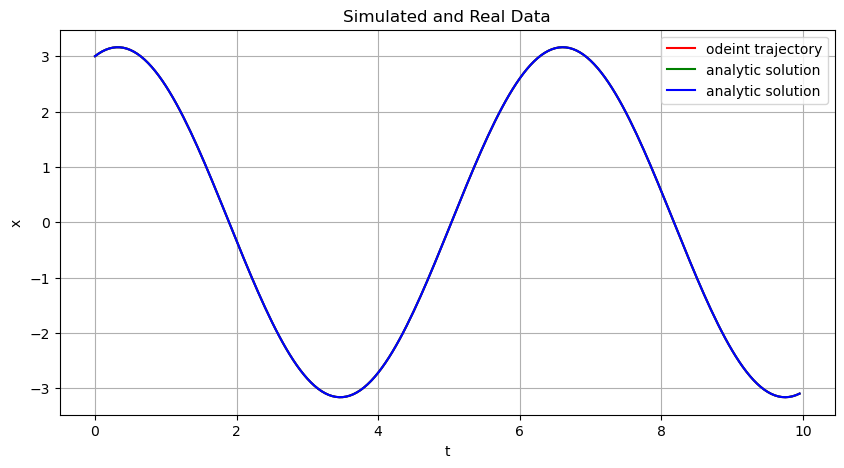

In [23]:
initial_condition = [1, 3]

k = 1
m = 1
omega0 = np.sqrt(k/m)
omega0_2 = k/m
print(omega0,omega0_2)
t = np.arange(0,10,0.05)
sigma = 0.1
sol_numerical = odeint(diffyqs, initial_condition, t, args=(omega0_2,)) # pass odeint the differential equation, initial condition, time array, and parameters
sol_analytic = analytic_sol(t,omega0,initial_condition)
sol_analytic_fancy = analytic_sol_fancy(t,omega0,initial_condition)
x_true = sol_analytic
# plot plot plot
plt.figure(figsize=(10,5))
plt.plot(t,sol_numerical[:,1], label = 'odeint trajectory',c = 'r') # to get the right part of the solution you have to do this weird transpose index thing
plt.plot(t,sol_analytic, label = "analytic solution", c = 'g')
plt.plot(t,sol_analytic_fancy, label = "analytic solution", c = 'b')
plt.title('Simulated and Real Data')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()
plt.show()

In [24]:

def log_likelihood(theta):
    a,b = theta
    if a == 0. and b == 0.:
        a = 0.01

    omega0 = a**2 + b**2 
    sol = analytic_sol(t,omega0,initial_condition)
    return np.sum(np.log(1/(sigma* (2*np.pi)**0.5)) - (0.5/sigma**2) * (sol - x_true)**2)

In [25]:
log_likelihood((0.,0.))

-796062.728782125

In [33]:
D = 2

LB = np.full((1, D), -10.0)  # Lower bounds
UB = np.full((1, D), 10.0)  # Upper bounds

PUB = np.full((1, D), 1.5)
PLB = np.full((1, D), -1.5)


x0 = 0.01* np.ones((1, D))

options = {
    "max_fun_evals": 500,
    "skip_active_sampling_after_warmup":True
    #"display": "off"
}

print(options)
print("LB:",LB,"PLB:",PLB,"PUB:",PUB,"UB:",UB,'x0:',x0)

{'max_fun_evals': 500, 'skip_active_sampling_after_warmup': True}
LB: [[-10. -10.]] PLB: [[-1.5 -1.5]] PUB: [[1.5 1.5]] UB: [[10. 10.]] x0: [[0.01 0.01]]


In [34]:
vbmc = VBMC(log_likelihood, x0, LB, UB, PLB, PUB, prior = SplineTrapezoidal(LB, PLB, PUB, UB), options = options)

vp, results = vbmc.optimize();

Beginning variational optimization assuming EXACT observations of the log-joint.
 Iteration  f-count    Mean[ELBO]    Std[ELBO]    sKL-iter[q]   K[q]  Convergence  Action


     0         10      -94383.86     67781.33     62747.62        2        inf     start warm-up
     1         15      -30834.12     97727.05    212753.61        2        inf     
     2         20      -71641.28    123402.44     18502.56        2   9.83e+05     
     3         25      -79855.86     92576.72     14935.48        2   6.88e+05     
     4         30      -86039.08     32714.83     76625.78        2   1.94e+06     
     5         35      -51380.44     24649.09    217697.59        2   5.33e+06     
     6         40      -77055.61     30909.38     63008.04        2   1.67e+06     
     7         45      -74326.58     66078.65    209378.97        2   5.16e+06     
     8         50      -87266.66     65775.32    197358.87        2   4.91e+06     trim data
     9         50      -84517.99      7555.50   1007945.56        2   2.38e+07     
    10         55      -83098.24      8697.24     24082.69        2   6.01e+05     
    11         60      -78763.90      7053.37      293

c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 0. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)
c:\Users\walki\.conda\envs\bpe\Lib\site-packages\pyvbmc\vbmc\active_sample.py:584: UserWarning: Rank-one update of Cholesky factor unstable for posterior 2. Reverting to full update.
  gp.update(xnew, ynew, compute_posterior=True)


    19        100      -39728.99     10076.12       547.64        2   4.69e+04     end warm-up
    20        100         258.59         3.83     10375.23        2   3.78e+05     
    21        105         259.31         2.63         0.32        2       18.7     
    22        110         216.18        32.94         8.75        3        460     
    23        115         252.27        12.91        48.57        3   1.31e+03     
    24        120          -4.02       130.05        70.80        3   2.96e+03     
    25        125         239.72         9.61        56.08        3   2.17e+03     
    26        130         258.01         0.33        63.91        3   1.57e+03     
    27        135         258.39         0.03         1.73        4       42.1     
    28        140         258.87         0.01        29.84        5        705     
    29        145         258.91         0.01         0.92        6       21.8     
    30        150         251.88         2.58        35.23       

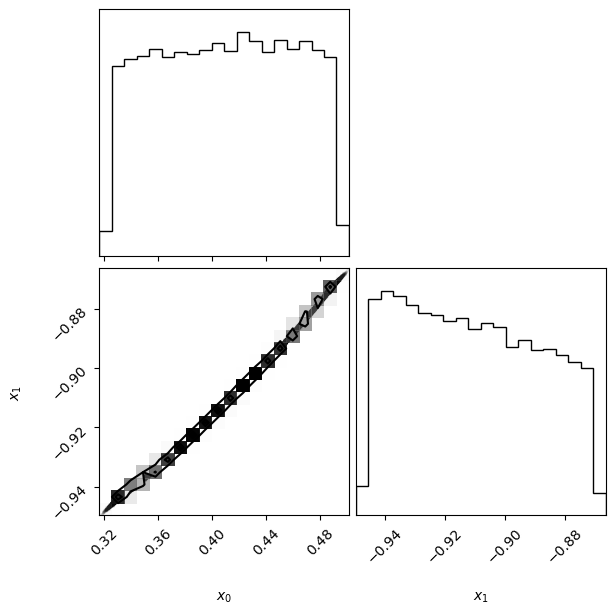

In [35]:
vp.plot();

dont't need likelihood, not releant to what we want to communicate, same thing for number of evaluations. Stepping up examples as a narrative where each adds a complication, new interesting thing that fits with what we are trying to communicate.